Neural Network - cz. 1 Analiza Danych

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
## Zad. 1 Pobierz z zakładki data train oraz test.csv
## https://www.kaggle.com/competitions/titanic/data
## oraz stwórz z nich jeden dataFrame w pandas
data = pd.read_csv("./train.csv", sep=",")

In [5]:
## Zad. 2 Wyświetl pierwsze 20 wierszy, aby obejrzeć dane oraz korzystając z gotowych funkcji pandas wyświetl podstawowe informacje o df
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
## Zad. 3 Dla każdej z kolumn wyświetl liczbę wartości nullowych (w ten sposób oceniamy jakość danych kolumn)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
## Analiza cech
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
## Zad. 4 Za pomocą gotowej funkcji pandas zbadaj korelację między kolumnami
data.corr(numeric_only=True)
## Tu wpisz kolumnę, która na pewno nie będzie miała korelacji PassegnerId <--- Wyrzuć ją z df
# Remove PassengerId from data
data.drop(labels=["PassengerId"], axis=1, inplace=True)

<AxesSubplot: >

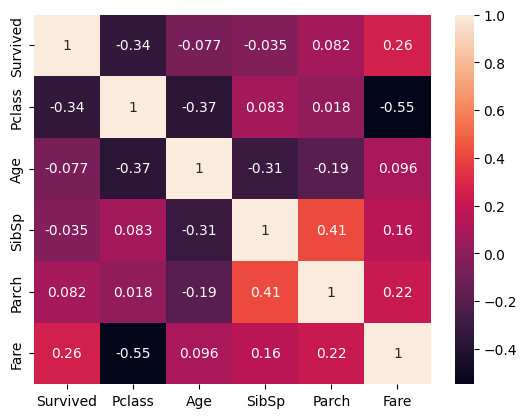

In [9]:
## Zad. 5 Za pomocą biblioteki seaborn (później nazywaną sns) wyświetl wykres Heatmap z danymi wygenerowanymi w punkcie 4
sns.heatmap(data.corr(numeric_only=True), annot=True)

<AxesSubplot: xlabel='Pclass', ylabel='count'>

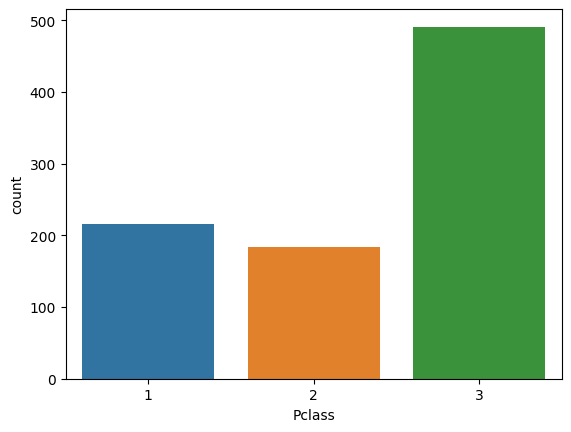

In [10]:
## Zad 7. Za pomocą sns wyświetl wykres słupkowy, który zliczy liczbę osób per każda Pclass (Passenger Class) + słowne wnioski
sns.countplot(x="Pclass", data=data)

# Więcej osób było biedakami niż bogatymi

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

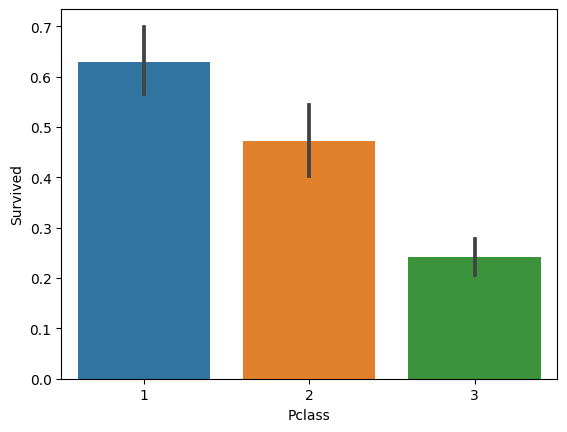

In [11]:
## Zad 8. Za pomocą sns wyświetl wykres słupkowy, który przestawi prawdopodobieństwo przeżycia per każda Pclass (Passenger Class) + słowne wnioski
sns.barplot(x="Pclass", y="Survived", data=data)

# Wnioskuję, iż istnieje duża szansa na to że ktoś z klasy wyższej przeżyje bardziej,
# niż z klasy niższej

<AxesSubplot: xlabel='Sex', ylabel='count'>

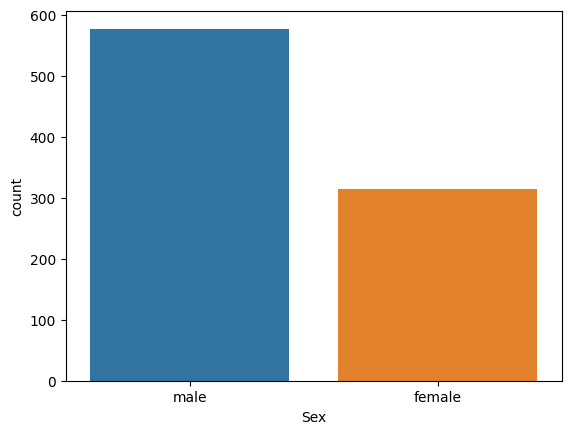

In [12]:
## Zad 9. Za pomocą sns wyświetl wykres słupkowy, który zliczy liczbę osób per każda płeć + słowne wnioski
sns.countplot(x="Sex", data=data)

# Więcej mężczyzn niż kobiet

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

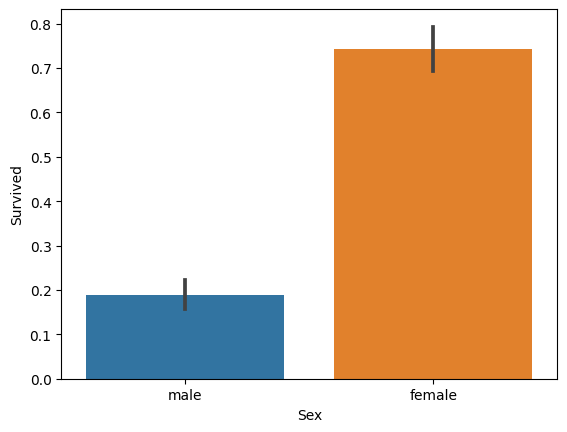

In [13]:
## Zad 10. Za pomocą sns wyświetl wykres słupkowy, który przestawi prawdopodobieństwo przeżycia per każda płeć + słowne wnioski
sns.barplot(x="Sex", y="Survived", data=data)

# W 1912 roku nie istniało równouprawnienie

<AxesSubplot: xlabel='Pclass', ylabel='count'>

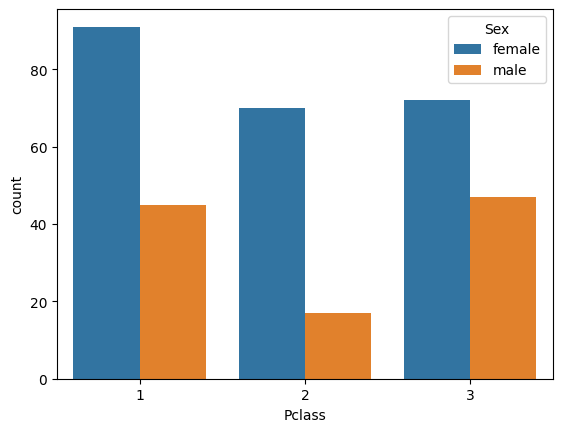

In [14]:
## Zad 11. Za pomocą sns na jednym wykresie słupkowym zlicz każdej Pclass ile osób przeżyło w podziale na płeć + słowne wnioski
sns.countplot(x="Pclass", hue="Sex", data=data.loc[data["Survived"] == 1])

# Przeżyło więcej kobiet niż mężczyzn i więcej osób z klasy wyższej

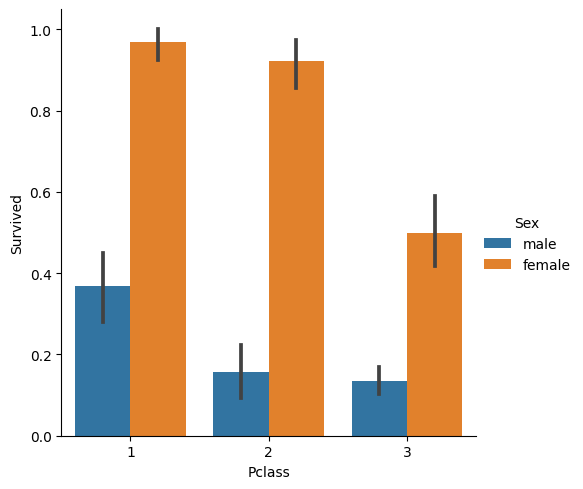

In [15]:
## Zad 12. Za pomocą sns na jednym wykresie słupkowym pokaż dla każdej Pclass prawdopodobieństwo przeżycia w podziale na płeć + słowne wnioski
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=data)

# Jak wyżej

<AxesSubplot: xlabel='Age', ylabel='Survived'>

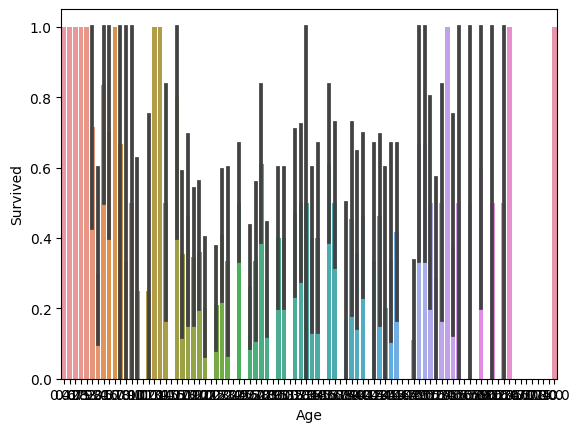

In [16]:
## Zad 13. Za pomocą sns wyświetl wykres słupkowy, który przestawi prawdopodobieństwo przeżycia per wiek + słowne wnioski
sns.barplot(x="Age", y="Survived", data=data)

# Najpierw ratowano dzieci i starszych

In [17]:
## Zad. 14 Dodaj nową kolumnę AgeCat do df, która nada każdej osobie klasę "adult" lub "child"

data["AgeCat"] = data["Age"].apply(lambda x: "child" if x < 18 else "adult")

<AxesSubplot: xlabel='AgeCat', ylabel='Survived'>

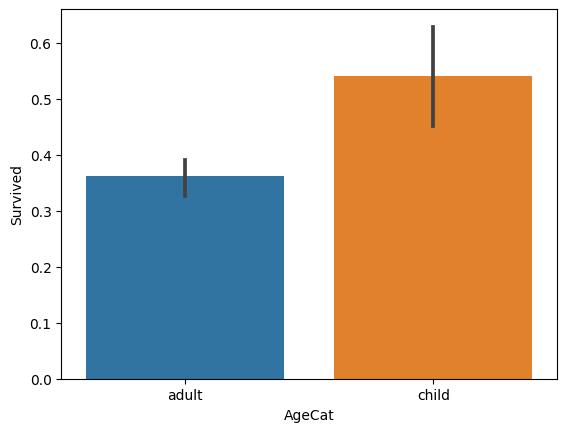

In [18]:
## Zad. 15 Na utworzonej wyżej kolumnie za pomocą sns przedstaw wykres przedstawiający prawdopodobieństwo przeżycia + słowne wnioski
sns.barplot(x="AgeCat", y="Survived", data=data)

# Większą szansę na przeżycie miały dzieci

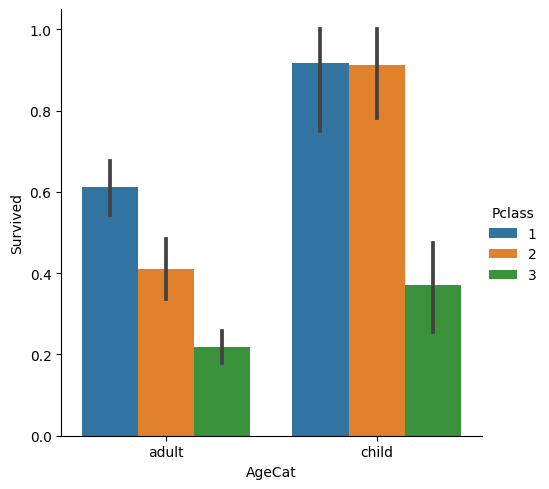

In [19]:
## Zad. 16 Do wyżej utworzonego wykresu w zadaniu 15 Dodaj jeszcze podział na Passanger Class + słowne wnioski
sns.catplot(x="AgeCat", y="Survived", hue="Pclass", kind="bar", data=data)

# Dzieci biednych były ratowane ostatnie

<AxesSubplot: xlabel='SibSp', ylabel='Count'>

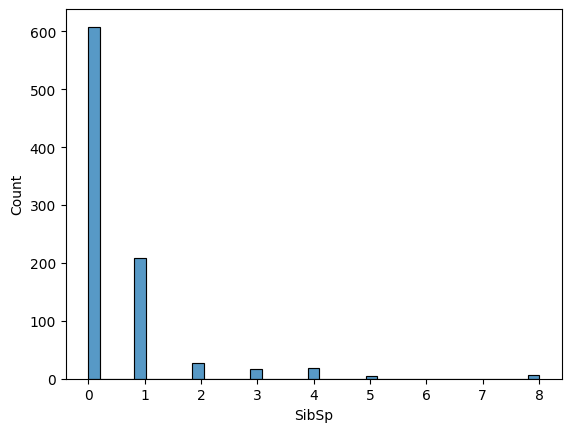

In [20]:
## Zad 17. Za pomocą sns na jednym wykresie słupkowym zlicz liczbę osób, które miało poszczególną ilość Siblings/Spouses + słowne wnioski
sns.histplot(x="SibSp", data=data)

# Znaczna większość osób była samotna

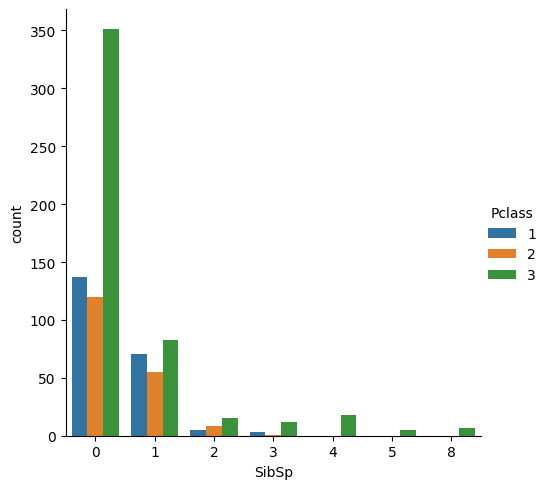

In [21]:
## Zad. 18 Za pomocą sns na jednym wykresie słupkowym zlicz liczbę osób, które miało poszczególną ilość Siblings/Spouses w podziale na Pclass + słowne wnioski
sns.catplot(x="SibSp", hue="Pclass", kind="count", data=data)

# Ludzie w klasie niższej mieli większe rodziny niż w wyższej

<AxesSubplot: xlabel='Parch', ylabel='Count'>

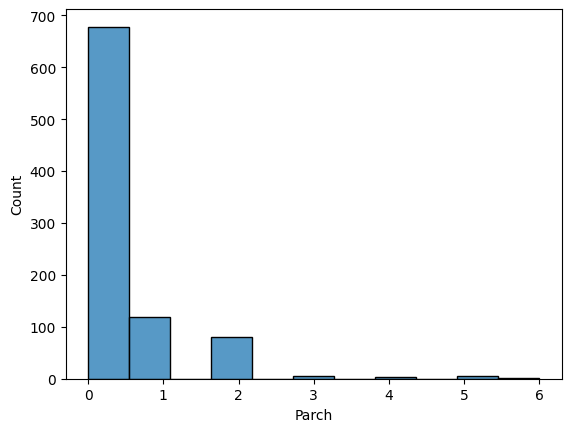

In [22]:
## Zad 17. Za pomocą sns na jednym wykresie słupkowym zlicz liczbę osób, które miało poszczególną ilość Parents / Chindres (Parch) + słowne wnioski
sns.histplot(x="Parch", data=data)

In [23]:
## Zad. 18 Proszę sprawdzić, czy w w df znajdują się osoby, które mają taki sam numer biletu. Jeśli tak - proszę podzielić Fare przez odpowiednią liczbę osób (opłata za rejs) i zapisać w kolumnie FareCorr
if not data[data.duplicated(["Ticket"], keep=False)].empty:
    data["FareCorr"] = data["Fare"] / data.groupby("Ticket")["Ticket"].transform(
        "count"
    )

In [24]:
## Zad. 19 Proszę utworzyć nową kolumnę FareCat z etykietą per Fare "low" ,"medium", "high" w zależności od opłaty biletu 0,15, 65
data["FareCat"] = pd.cut(
    data["Fare"], bins=[0, 15, 65, np.inf], labels=["low", "medium", "high"]
)

<AxesSubplot: xlabel='FareCat', ylabel='Survived'>

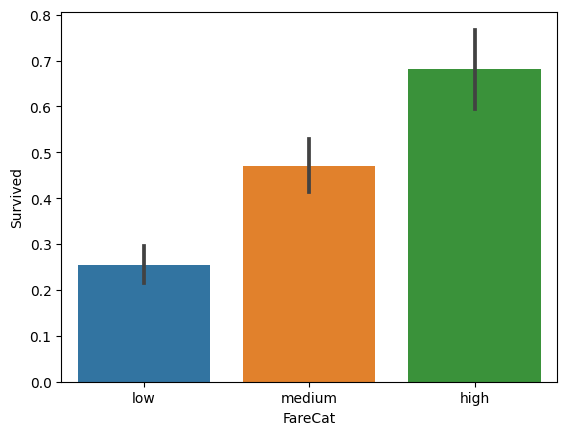

In [25]:
## Zad. 20 Za pomocą sns wyświetl wykres słupkowy, który przestawi prawdopodobieństwo przeżycia per FareCat + słowne wnioski
sns.barplot(x="FareCat", y="Survived", data=data)

# Wyższa opłata za bilet dawała większą szansę na przeżycie

<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

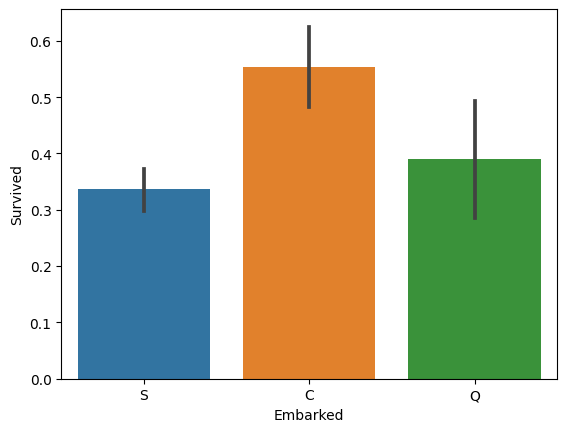

In [26]:
## Zad. 21 Za pomocą sns wyświetl wykres słupkowy, który przestawi prawdopodobieństwo przeżycia per Embarked (port z którego wsiadał pasażer)
sns.barplot(x="Embarked", y="Survived", data=data)

# Większa szansa na przeżycie dla osób wsiadających w C

In [27]:
## Zad. 22 Proszę utworzyć nową kolumnę "tytuł", gdzie znajdą się np. Mr, Miss, Dr, Master
data["title"] = data["Name"].str.extract(r", ([A-Za-z ]+).", expand=False)

In [28]:
## Zad. 23 Na podstawie tytułu proszę uzupełnić wiersze, które mają puste pola w Age oraz AgeCat. Dla każdego z tytułu proszę policzyć medianę i taką wartością uzupełnić Nulle

# First, get median age per title
age_per_title = data.groupby("title")["Age"].median()

# Second, fill nulls with median age per title
data["Age"] = data.apply(
    lambda x: age_per_title[x["title"]] if pd.isnull(x["Age"]) else x["Age"], axis=1
)
data["AgeCat"] = data.apply(lambda x: "child" if x["Age"] < 18 else "adult", axis=1)

In [29]:
## Zad. 24 Z kolumny tytuł proszę sprawdzić jaka głównie występuje płeć i uzupełnić Nulle w kolumnie płeć
sex_per_title = data.groupby("title")["Sex"].apply(lambda x: x.mode()[0])

data["Sex"] = data.apply(
    lambda x: sex_per_title[x["title"]] if pd.isnull(x["Sex"]) else x["Sex"], axis=1
)

In [30]:
## Zad. 25 Proszę utworzyć kolumnę familySize, gdzie nadadzą Państwo klasę "small", "medium", "big" na podstawie Parch, oraz Sib / Sp
data["familySize"] = pd.cut(
    data["Parch"] + data["SibSp"],
    bins=[-1, 3, 5, np.inf],
    labels=["small", "medium", "big"],
)

<AxesSubplot: xlabel='familySize', ylabel='Survived'>

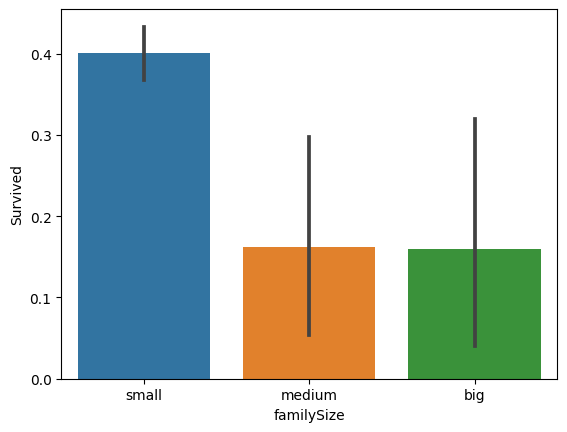

In [31]:
## Zad. 26 Na podstawie utworzonej kolumny w zadaniu 25 proszę o utworzenie wykresu, którzy przedstawi szanse na przeżycie
sns.barplot(x="familySize", y="Survived", data=data)

In [32]:
## Zad. 27 Proszę uzupełnić kolumnę Nulle w Embarked najczęstszą wartością występującą w df

data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

In [33]:
data2 = data.copy()

In [34]:
# Zad. 1 Za pomocą funkcji pandas qcut, proszę nadać klasy od 1 do 7 dla kolumny Age

data2['AgeClass'] = pd.qcut(data['Age'], 7)
data2['AgeClass'] = data2['AgeClass'].cat.codes + 1

In [35]:
# Zad. 2 Dla kolumny zawierającej opłaty za bilet dla 1 osoby, prosze nadać klasy od 1 do 7
# jak w powyższym zadaniu

data2['FareClass'] = pd.qcut(data['FareCorr'], 7)
data2['FareClass'] = data2['FareClass'].cat.codes + 1

In [36]:
# Zad. 3 Proszę zmienić płeć na 0 i 1

data2['IsMale'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
data2['IsFemale'] = data['Sex'].apply(lambda x: 1 if x == 'female' else 0)

In [37]:
# Zad. 5 Proszę wybrać ze wszystkich kolumn (oryginalnych i dodanych) 6, które najlepiej
# korelują z Survive

data2.corr(numeric_only=True)['Survived'].sort_values(ascending=False, key=abs)

df_prep = data2[['Survived', 'Pclass', 'Sex', 'FareCorr', 'Age', 'familySize', 'Embarked']]

In [38]:
def one_hot_encode(df: pd.DataFrame, column_name: str):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df, dummies], axis=1)
    return df

In [39]:
# Zad. 6 proszę wykonać One-Hot encoding na kolumnach, które zawierają dane tekstowe
# bądź kategorie (np. klasa pasażerska lub klasa płci)
df_prep = one_hot_encode(df_prep, 'Sex')
df_prep = one_hot_encode(df_prep, 'familySize')
df_prep = one_hot_encode(df_prep, 'Embarked')
df_prep = one_hot_encode(df_prep, 'Pclass')

In [40]:
def scale(df: pd.DataFrame, column_name: str):
    df[column_name] = (df[column_name] - df[column_name].mean()) / df[column_name].std()
    return df

In [41]:
# Zad. 7 Proszę przeskalować dane numeryczne aby mieściły się w zakresie -1 a 1

df_prep = scale(df_prep, 'FareCorr')
df_prep = scale(df_prep, 'Age')

In [42]:
df = df_prep.drop(columns=['Sex', 'familySize', 'Embarked', 'Pclass'], errors='ignore')
df

,Survived,FareCorr,Age,Sex_female,Sex_male,familySize_small,familySize_medium,familySize_big,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,-0.496697,-0.557107,0,1,1,0,0,0,0,1,0,0,1
1,1,2.521157,0.649046,1,0,1,0,0,1,0,0,1,0,0
2,1,-0.464884,-0.255569,1,0,1,0,0,0,0,1,0,0,1
3,1,0.412902,0.422892,1,0,1,0,0,0,0,1,1,0,0
4,0,-0.458993,0.422892,0,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.225702,-0.180184,0,1,1,0,0,0,0,1,0,1,0
887,1,0.575498,-0.783260,1,0,1,0,0,0,0,1,1,0,0
888,0,-0.285792,-0.632491,1,0,1,0,0,0,0,1,0,0,1
889,1,0.575498,-0.255569,0,1,1,0,0,1,0,0,1,0,0


In [43]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

2023-01-17 20:27:09.092205: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-17 20:27:09.970316: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-17 20:27:09.970391: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-17 20:27:14.657842: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [52]:
# Zad. 8 Prosze za pomocą Keras stworzyć model sekwencyjny (przy pomocy dokumentacji
# keras) z trzema warstwami

X = df.drop(columns=['Survived'])
y = df['Survived']

model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=[len(X.columns)]),
    keras.layers.Dense(6, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [54]:
# Zad. 9 Proszę skompilować model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
# Zad. 10 Proszę podzielić dane na zbiór testowy oraz trenujący
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
# Zad. 11 proszę wytrenować model na danych treningowych

model.fit(X_train, y_train, epochs=100, verbose=0)

In [57]:
# Zad. 12 Proszę dokonać ewaluacji modelu

model.evaluate(X_test, y_test)

6/6 [==============================] - 1s 10ms/step - loss: 0.3915


0.39146503806114197

In [49]:
# Zad. 13 Proszę zmienić parametry modelu (zmienić np. liczbę warstw, wierzchołków,
# learning rate) i wybrać ten, który ma najlepsze wyniki
X2 = df.drop(columns=['Survived'])
y2 = df['Survived']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

model2 = keras.Sequential([
    keras.layers.Dense(3, activation=tf.nn.relu, input_shape=[len(X.columns)]),
    keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X2_train, y2_train, epochs=200, verbose=0, workers=4, use_multiprocessing=True)
model2.evaluate(X2_test, y2_test, verbose=0)[1]

0.8156424760818481

In [50]:
# Zad. 14 Proszę wykonać predykcję za pomocą modelu na danych testowych
model2.predict(X_test)

6/6 [==============================] - 0s 5ms/step


array([[0.8590235 ],
       [0.14745899],
       [0.14745899],
       [0.14745899],
       [0.14745899],
       [0.14745899],
       [0.893037  ],
       [0.14745899],
       [0.14745899],
       [0.14745899],
       [0.67092323],
       [0.38088885],
       [0.92590994],
       [0.14745899],
       [0.14745899],
       [0.92209995],
       [0.14745899],
       [0.5214441 ],
       [0.96530515],
       [0.14745899],
       [0.9576103 ],
       [0.14745899],
       [0.14745899],
       [0.39640376],
       [0.14745899],
       [0.17750435],
       [0.4136212 ],
       [0.30201465],
       [0.18559554],
       [0.14745899],
       [0.42686585],
       [0.14745899],
       [0.14745899],
       [0.17863978],
       [0.97645515],
       [0.14745899],
       [0.8940974 ],
       [0.14745899],
       [0.96126467],
       [0.98305804],
       [0.2073232 ],
       [0.14745899],
       [0.14745899],
       [0.5071871 ],
       [0.38869828],
       [0.14745899],
       [0.14745899],
       [0.147

In [51]:
# Zad. 15 Prosze zapisać wytrenowany model w formacie h5

model2.save('model.h5')